# Bear Detector with FastAI with Google Images

In [2]:
from fastai.vision import *

## Get URLs from Google Images

We go to Google Images and type "brown bear" and "sheep" in the search toolbar.

we press Cmd + Opt+ J which opens a javascript Console in which we paste the following code


    urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
    window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
    
This allows to download a csv file with the list of the urls of all the images.

### Create directory and download images in the folders

We create folders that have the names of the classes. Here, bears vs sheeps

In [2]:
folder = 'bears'
file = './ours_brun_google_images.csv'

In [89]:
path = Path('./')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [90]:
download_images(path/file, dest, max_pics=200, max_workers=0)

In [91]:
folder = 'sheeps'
file = './mouton2.csv'

In [6]:
path = Path('./')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [93]:
download_images(path/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

## Clean the images

In [4]:
classes = ['bears','sheeps']

This verifies that all in the folders are images. This doesn't do further cleaning

In [7]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

bears


sheeps


In [13]:
#pip install ipywidgets

You are using pip version 19.0.3, however version 20.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
from fastai.widgets import *

In [4]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

NameError: name 'path' is not defined

In [3]:
learn_cln = cnn_learner(db, models.resnet18, metrics=error_rate)

learn_cln.load('stage-2');

NameError: name 'db' is not defined

In [11]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [14]:
dir(ImageCleaner)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_get_change_payload',
 '_get_label',
 'batch_contains_deleted',
 'before_next_batch',
 'create_image_list',
 'delete_image',
 'get_widgets',
 'make_button_widget',
 'make_dropdown_widget',
 'make_horizontal_box',
 'make_img_widget',
 'make_payload',
 'make_vertical_box',
 'next_batch',
 'on_delete',
 'relabel',
 'render',
 'write_csv']

In [12]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
ImageCleaner(ds, idxs, path)

'No images to show :)'

In [ ]:
ImageCleaner()

In [13]:
df = pd.read_csv('./cleaned.csv')
df.head

<bound method NDFrame.head of                     name   label
0    sheeps/00000158.jpg  sheeps
1    sheeps/00000170.jpg  sheeps
2    sheeps/00000038.jpg  sheeps
3    sheeps/00000010.jpg  sheeps
4    sheeps/00000004.jpg  sheeps
..                   ...     ...
288   bears/00000021.jpg   bears
289   bears/00000035.jpg   bears
290   bears/00000196.jpg   bears
291   bears/00000169.jpg   bears
292   bears/00000155.jpg   bears

[293 rows x 2 columns]>

## View data

In [111]:
#np.random.seed(42)
#data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
#        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

This cell creates the ImageDataBunch with the cleaned csv and automatically creates a validation set of 20%.

In [6]:
path = './'

In [7]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

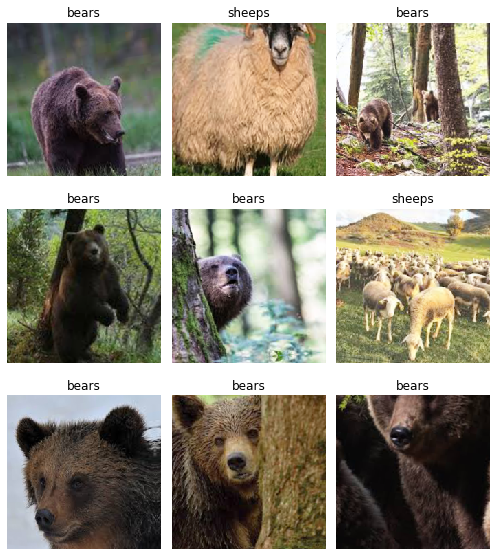

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bears', 'sheeps'], 2, 235, 58)

## Train model

We create a CNN model Resnet 18 and we view the metrics of error rate and accuracy.

In [9]:
model = cnn_learner(data, models.resnet18, metrics=[error_rate, accuracy])

In [10]:
model.fit_one_cycle(4)

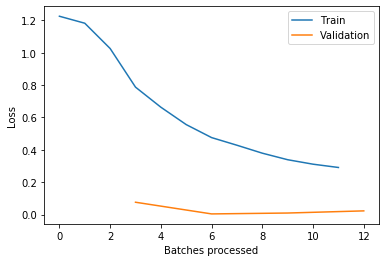

In [16]:
model.recorder.plot_losses()

In [17]:
model.save('stage-2')

## Interpretation

In [18]:
model.load('stage-2');

In [19]:
interp = ClassificationInterpretation.from_learner(model)

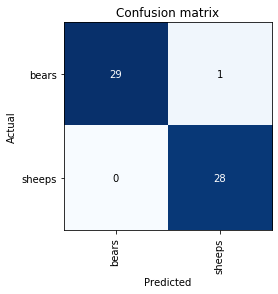

In [20]:
interp.plot_confusion_matrix()

## Using the model 

In [23]:
model.export()

In [24]:
defaults.device = torch.device('cpu')

In [27]:
ls

Untitled.ipynb               models/
bear_detector.ipynb          mouton2.csv
bears/                       my_bear_detector.ipynb
biblio_bear_project/         ours_brun_google_images.csv
cleaned.csv                  sheeps/
export.pkl


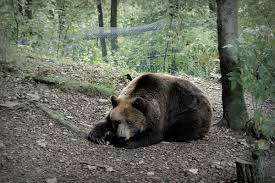

In [40]:
img = open_image('00000009.jpg')
img

In [41]:
learn = load_learner(path)

In [42]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category bears